In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

Objective:
--
-  To build a model to predict whether personal income would be over 50 or not based on pattern extracted from analysing features.

In [2]:
train_data = pd.read_csv('/content/adult.csv')
test_data = pd.read_csv('/content/adult.test.csv')

In [3]:
train_data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship',
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data.columns = col_labels

In [5]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_data.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   25                  16280 non-null  int64 
 1    Private            16280 non-null  object
 2   226802              16280 non-null  int64 
 3    11th               16280 non-null  object
 4   7                   16280 non-null  int64 
 5    Never-married      16280 non-null  object
 6    Machine-op-inspct  16280 non-null  object
 7    Own-child          16280 non-null  object
 8    Black              16280 non-null  object
 9    Male               16280 non-null  object
 10  0                   16280 non-null  int64 
 11  0.1                 16280 non-null  int64 
 12  40                  16280 non-null  int64 
 13   United-States      16280 non-null  object
 14   <=50K.             16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Bisa dilihat bahwa DataFrame `test_data` tidak memiliki nama kolom layaknya `train_data` sehingga harus dilakukan treatment untuk menyamakan nama kolom, lalu dilakukan penggabungan dataset antara `test_data` dan `train_data`

In [9]:
# menyamakan kolom train data dengan test data
columns=train_data.columns
test_data.columns=columns

In [10]:
# menggabungkan kedua dataset menjadi variabel bernama df
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Memastikan bahwa data tidak mengandung spasi yang tidak perlu.
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### Handling `workclass` and `occupation` column

In [13]:
# Memastikan tentang kolom lain
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

`?` Itu menunjukkan data yang hilang, jadi mari kita ubah.

In [14]:
# Merubah nilai '?' dengan nilai nan
df.replace("?", np.nan, inplace=True)

In [15]:
# membuat var data_na untuk cek kolom dengan nilai na
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

,0
occupation,2809
workclass,2799
native_country,857


In [16]:
# cek jumlah kolom workclass dan occupation yang sama sama bernilai na (.isna)
len(df[df['workclass'].isna() & df['occupation'].isna()])

2799

In [17]:
# cek individu yang ada status bekerja/nilainya('workclass'), tapi jabatannya kosong ('occupation')
df[df['occupation'].isna() & df['workclass'].notna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
41345,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
44167,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
46458,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [18]:
df.loc[df['occupation'].isna() & df['workclass'].notna(), 'workclass'].value_counts()

,count
workclass,
Never-worked,10




- Terdapat 2799 baris pada kolom `Occupation` dan `Workclass` yang hilang. Namun, kolom Pekerjaan memiliki 10 data yang hilang lebih banyak karena orang tersebut tidak bekerja.

- Oleh karena itu, kita mengganti data tersebut dengan `no-occupation`.

In [19]:
df[df['workclass']=='Never-worked']= df[df['workclass']=='Never-worked'].fillna('No-occupation')

### Handling `native_country` column

In [20]:
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [21]:
df['native_country'].value_counts()[:5]

,count
native_country,
United-States,43831
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184


In [22]:
# Cek berapa nilai NaN pada kolom 'native_country'
print(f"Number of NaN values in 'native_country' column: {df['native_country'].isna().sum()}")

Number of NaN values in 'native_country' column: 857


Pada kolom `native_country` juga terdapat var nan, oleh karena itu diisi dengan nilai modus yaitu `United-States`

In [23]:
# Handling nilai NaN pada native_country diisi dengan nilai modus yaitu 'United-States'
df['native_country'].fillna('United-States', inplace=True)

In [24]:
#sanity check kolom yang masih mengandung nilai NaN
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

,0
workclass,2799
occupation,2799


Menangani missing value 'na' pada kolom `workclass` dan `occupation`. Sedangkan untuk kolom `native_country` sudah bersih dari nilai na.

In [25]:
#opsi 1 (terbaik, at least menurut saya): "unknown labeling" -> mencegah kehilangan data yang mungkin valid.
df['workclass'] = df['workclass'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')

In [26]:
#opsi 2 dan 3: deletion / diisi dengan nilai modus -> ada resiko kehilangan data

Reasoning:
--
Menggunakan label `"Unknown" (atau kategori baru)` sering kali lebih bijak daripada menggunakan `mode (nilai terbanyak)` atau `menghapus data` karena metode ini menjaga informasi tentang "ketidakhadiran" data tersebut, yang sering kali memiliki pola tersendiri.

Berikut adalah perbandingan mengapa pelabelan "Unknown" lebih unggul dalam banyak kasus:
1. Menghindari "Signal Loss" (Dibanding Deletion)
--
- `Masalah Deletion:` Menghapus baris dengan nilai kosong akan `mengurangi jumlah sampel secara signifikan, terutama jika banyak kolom yang memiliki sedikit nilai kosong.
- `Keuntungan "Unknown":` Kamu mempertahankan seluruh baris data. Dalam model machine learning, baris yang datanya hilang mungkin memiliki korelasi dengan target (misalnya: orang yang tidak mengisi kolom "pendapatan" mungkin memiliki profil risiko tertentu).

2. Mencegah Bias Distribusi (Dibanding Mode Imputation)
--
- `Masalah Mode:` Mengisi semua nilai kosong dengan nilai terbanyak akan membuat kategori tersebut tampak jauh lebih sering terjadi daripada aslinya (artificial peak) ->  bisa **mendistorsi hubungan antar variabel dan mengecilkan variansi data.**
- `Keuntungan "Unknown":` Menjaga kemurnian data asli dan membiarkan model mempelajari bahwa "data tidak tersedia" adalah kategori yang berbeda.

3. Menangani Data yang Tidak Hilang Secara Acak (MNAR)
--
- `Teori:` Sering kali data hilang karena alasan tertentu (Missing Not At Random). Misalnya, responden survei sengaja tidak menjawab pertanyaan sensitif.
- `Manfaat:` Dengan label "Unknown", model dapat belajar bahwa status "hilang" tersebut adalah fitur prediktif. Jika kamu menggunakan mode, informasi penting ini akan tertutup oleh nilai yang sudah ada.

In [27]:
# Sanity Check -> nilai NaN pada kolom 'workclass' sudah terisi dengan nilai 'unknown'
df['workclass'].unique() # nan -> unknown

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [28]:
# Sanity Check -> nilai NaN pada kolom 'occupation' sudah terisi dengan nilai 'unknown'
df['occupation'].unique() # nan -> unknown

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', 'No-occupation'], dtype=object)

### Handling kolom `income`

In [29]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [30]:
# karena menggabungkan 2 df, kolom income dilakukan handling -> agar konsisten
df.replace({'income':{">50K.":">50K" , "<=50K.":"<=50K"}},inplace=True)

In [31]:
# Sanity Check: sudah terdapat dua kategori di kolom income (Y)
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Reasoning:
--
1. Sebelum melakukan analisis apa pun, mari kita ubah kolom target ke dalam kelas numerik.
2. Mengonversinya menjadi format biner (0 dan 1) untuk digunakan sebagai variabel target (Y) model Machine Learning

In [32]:
df['income'] = df['income'].replace({'<=50K':0,'>50K':1})

In [33]:
# Sanity Check: kolom income sudah berubah menjadi biner (0 dan 1)
df['income'].unique()

array([0, 1])

# Exploratory Data Analysis & Preprocessing

## Exploring the descriptive statistics of the variables

In [34]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48841.000000,48841,4.884100e+04,48841,48841.000000,48841,48841,48841,48841,48841,48841.000000,48841.000000,48841.000000,48841,48841.000000
unique,NaN,9,NaN,16,NaN,7,16,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,33905,NaN,15784,NaN,22379,6172,19716,41762,32649,NaN,NaN,NaN,44688,NaN
mean,38.643865,NaN,1.896634e+05,NaN,10.078152,NaN,NaN,NaN,NaN,NaN,1079.089720,87.504105,40.422391,NaN,0.239287
std,13.710511,NaN,1.056050e+05,NaN,2.570961,NaN,NaN,NaN,NaN,NaN,7452.093748,403.008483,12.391571,NaN,0.426652
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.175490e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781420e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376460e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [35]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  48841 non-null  object
 14  income          48841 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


## Check for any missing value in dataset

In [36]:
# Sanity checking nan values before Data Exploration
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


# Data Exploration

## Income

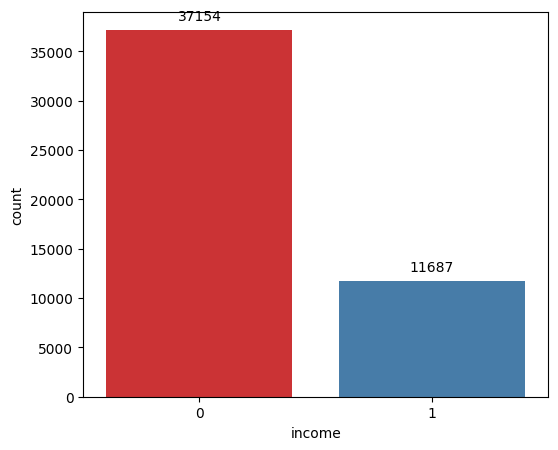

In [37]:
# Checking label counts
Workclass_data=df['income'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(6,5))
# Fix 1: Replace undefined 'r_color' with a standard color string
plot= sns.countplot(data=df, x='income', order=order, palette='Set1')

# Fix 2: Define add_value_labels function
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib axes object.
        spacing (int): The distance between the end of the bar and the label.
    """
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            space *= -1
            va = 'top'

        # Annotate the bar
        ax.annotate(f'{y_value:.0f}',                     # Use `y_value` to format label.
                    (x_value, y_value),         # Place label at end of the bar.
                    xytext=(0, space),          # Shift label by `space` in points.
                    textcoords="offset points", # Interpret `xytext` as offset in points.
                    ha='center',                # Horizontally center label.
                    va=va,                      # Vertically align label.
                    zorder=2) # Ensure label is on top of plot elements.

add_value_labels(plot)
plt.show()

In [38]:
print('-> Total No. of records : {}\n'.format(len(df)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(df[df['income']==1])/48841)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(df[df['income']==0])/48841)*100, 2)))

-> Total No. of records : 48841

-> Number of people making more that >50K : 23.93%

-> Number of people making less than or equal to <=50K : 76.07%


The distribution of the target column, we would find that the people with less than 50K annual income are 76.07% and the no. of people making more than 50K is 23.93%, so it's clear that the dataset is unbalanced.

## Age

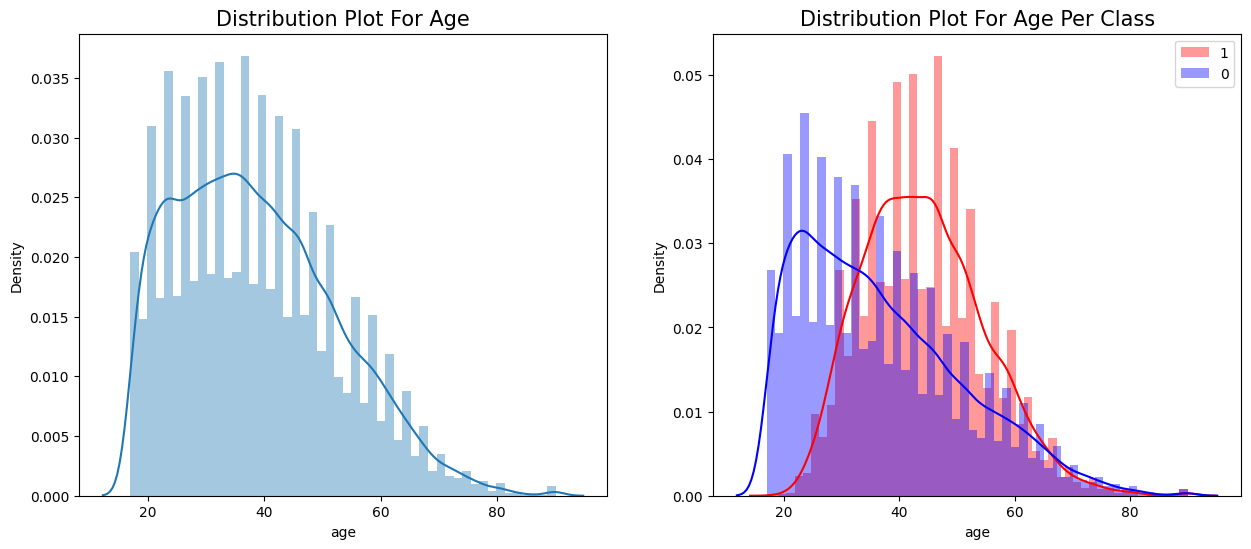

In [39]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(df[df['income']==1]['age'], label='1', color='red')
sns.distplot(df[df['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

Interpretasi Plot Distribusi Usia
1. Plot Kiri: Distribusi Usia Keseluruhan
Grafik ini menunjukkan bahwa sebagian besar orang dalam dataset berusia antara awal 20-an hingga sekitar 50 tahun. Distribusi ini tampak normal tetapi sedikit miring ke kanan.
Ada lebih sedikit data untuk orang yang sangat muda (di bawah 20 tahun) dan orang yang sangat tua (di atas 70 tahun).

2. Plot Kanan: Distribusi Usia per Kelas
Grafik ini membagi usia berdasarkan kelas target (pendapatan tahunan, di atas atau di bawah 50K)
* Kelas 0 (Biru): Mewakili orang dengan pendapatan rendah (<=50K). Kelompok ini memiliki puncak kepadatan (density) yang tinggi pada usia sekitar 20-an hingga 30-an tahun. Ini menunjukkan bahwa mayoritas populasi berpenghasilan rendah adalah orang yang relatif muda.
* Kelas 1 (Merah): Mewakili orang dengan pendapatan tinggi (>50K). Kelompok ini memiliki puncak kepadatan pada usia yang lebih tua, sekitar 40-an hingga 50-an tahun.
* Terdapat Overlap signifikan antara kedua kelas tersebut, terutama di usia 40-an.
* Kesimpulan: Secara visual, terlihat bahwa secara relatif, lebih sedikit orang muda yang berpenghasilan tinggi (>50K) dibandingkan dengan rekan-rekan mereka yang lebih tua, dan puncak pendapatan bergeser seiring bertambahnya usia.
Grafik-grafik ini menunjukkan bahwa usia adalah fitur yang sangat penting dan prediktif untuk model klasifikasi pendapatan Anda.

## Workclass

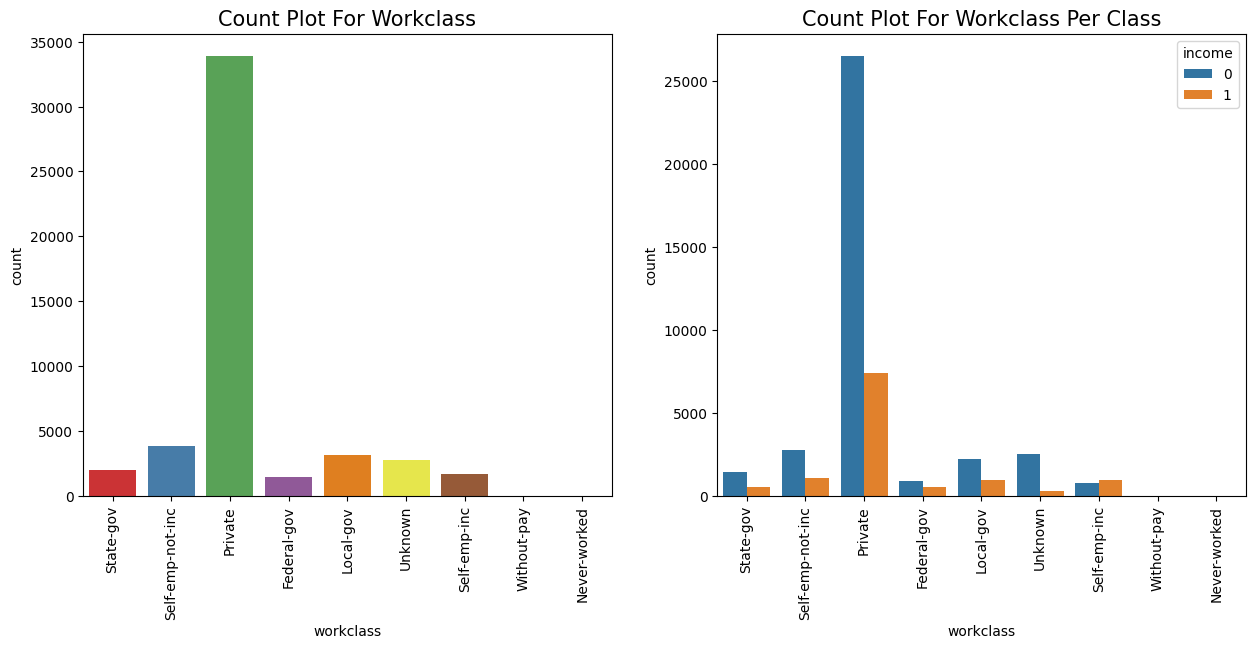

In [40]:
# Countplot for workclass column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
# Baris ini yang diubah: menambahkan hue='workclass'
sns.countplot(data=df, x='workclass', hue='workclass', palette='Set1', legend=False)
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Left Plot: Workclass Distribution
--
* Private Sector Dominance : The category Privateis the most significantly dominant, with over 30,000 data points.
* Minority : Categories like Without-payand Never-workedvery rare, each having less than 100 data points.
* Government : Workers in Local-gov, State-gov, and Federal-govare spread fairly evenly, around 2,000 to 3,000 data each.
* "Unknown" : There are around 2,000 data whose status workclassis unknown ( Unknown).

Right Plot: Distribution of Workclass per Income
--
* The right plot compares the number of people with low ( 0 for <=50K) and high ( 1 for >50K) incomes in each occupational category.
* Private Sector : While numerically dominant, the proportion of high-income earners (orange) in the sector Privateis visually small relative to the total blue bar. The majority of private sector workers are low-income.
* High Income Opportunity : The Self-emp-inc(Self-Employed Legal Entity) category has the best high to low income ratio.Federal-gov
* Certain Low Income : Category Without-payand Never-workedexpectation dominated by low income (only blue bar).

3. Overall, it is clear that `workclass has a strong relationship with income level`, making it a very useful feature.

## Education and Education Number

In [41]:
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

# Corrected column name from 'educationnum' to 'education_num'
EducationNum_data=df['education_num'].value_counts()
order2= list(EducationNum_data.index)

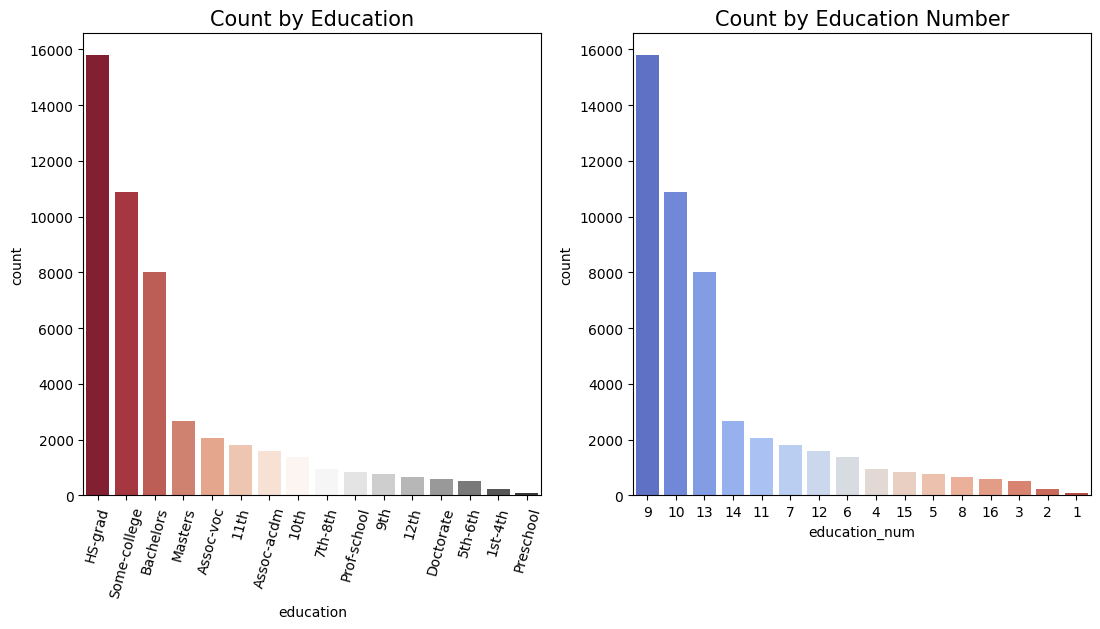

In [42]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='education', order=order1, palette = 'RdGy')
plt.title('Count by Education', fontsize=15)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='education_num', order=order2, palette = 'coolwarm')
plt.title('Count by Education Number', fontsize=15);

In [43]:
# sanity check: make sure bahwa 2 kolom diatas benar2 identik
# sehingga bisa dilakukan droping ke salah satu kolom tsb
education_classes = train_data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, train_data[train_data['education'] == educ_class]['education_num'].unique()))

 Bachelors, the Education Number is [13]
 HS-grad, the Education Number is [9]
 11th, the Education Number is [7]
 Masters, the Education Number is [14]
 9th, the Education Number is [5]
 Some-college, the Education Number is [10]
 Assoc-acdm, the Education Number is [12]
 Assoc-voc, the Education Number is [11]
 7th-8th, the Education Number is [4]
 Doctorate, the Education Number is [16]
 Prof-school, the Education Number is [15]
 5th-6th, the Education Number is [3]
 10th, the Education Number is [6]
 1st-4th, the Education Number is [2]
 Preschool, the Education Number is [1]
 12th, the Education Number is [8]


In [44]:
# education & education number column are just the same, so I am dropping education number column.
df.drop(labels='education_num', axis=1, inplace=True)

* From the analysis above, It's clear that `education` & `education number` column are `just the same`. so I am *dropping education number column*.

* In this dataset Most number of people are high school graduates with 9 to 10 years of education.

## Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

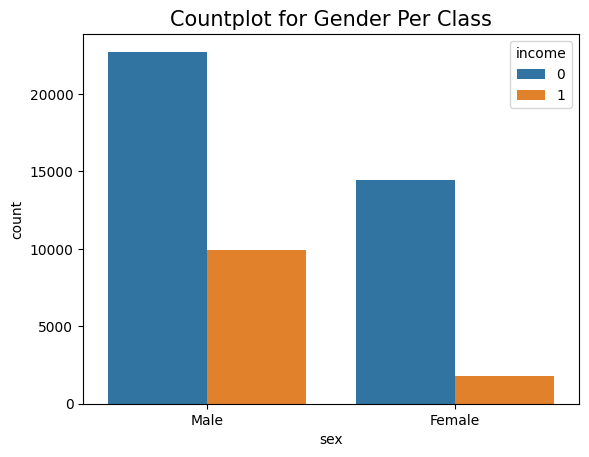

In [45]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=df, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

* The number of `male` candidates are more than female.
* When Comparing `male` and `female`, more percentage of male candidates are earn more than 50K.

## Maritial Status

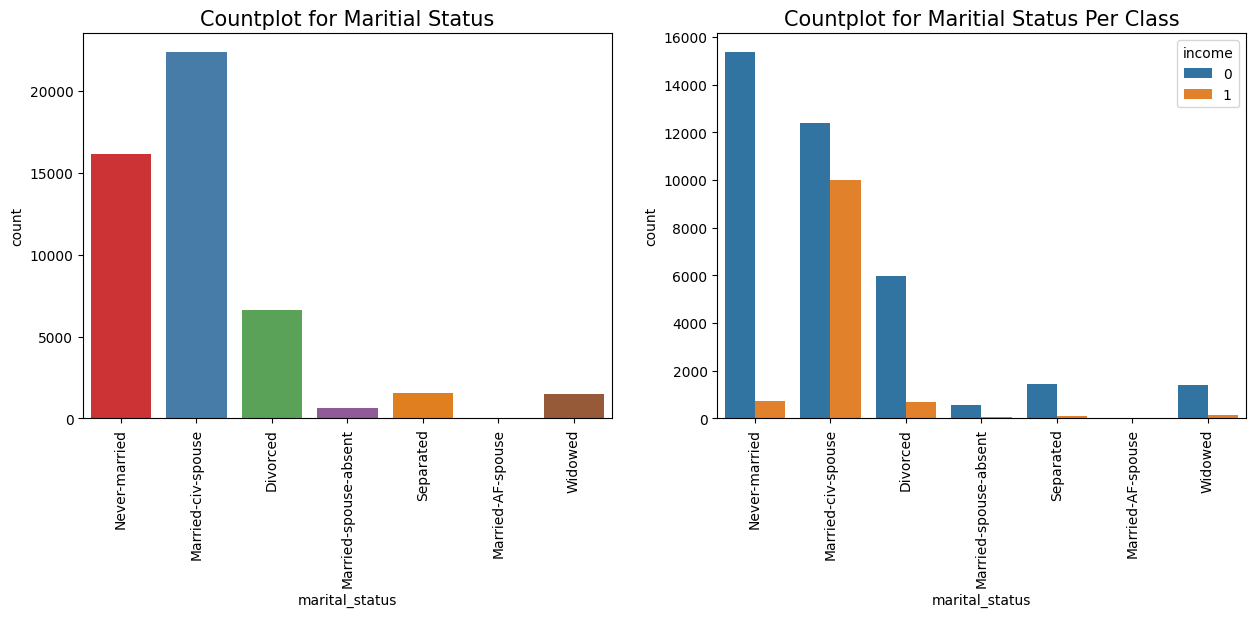


 --Value Counts-- 

marital_status
Married-civ-spouse       22379
Never-married            16116
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [46]:
# Countplot for Maritial Status
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x='marital_status', data=df, palette = 'Set1') # Changed to use data=df and x='marital_status'
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(x='marital_status', hue='income', data=df) # Corrected to use data=df, x, and hue as column names
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['marital_status'].value_counts())

Most of the people whose annual income is more than 50K, their marital status is married.

In [47]:
# Data Handling: Transforming Maritial Status column with value as either married or not married.
df = df.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

## Relationship

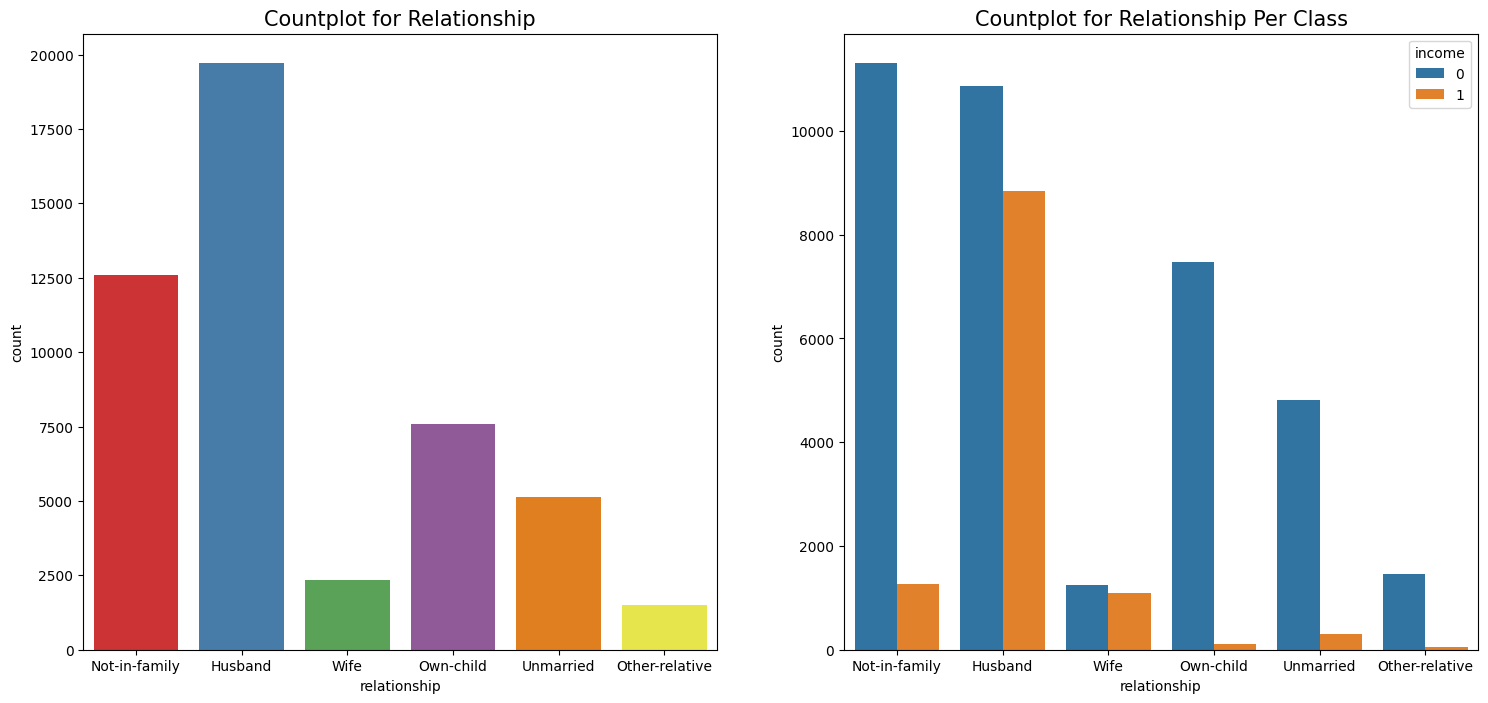


 --Value Counts-- 

relationship
Husband           19716
Not-in-family     12583
Own-child          7580
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


In [48]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(x='relationship', data=df, palette = 'Set1')
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(x='relationship', hue='income', data=df)
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(df['relationship'].value_counts())

## Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

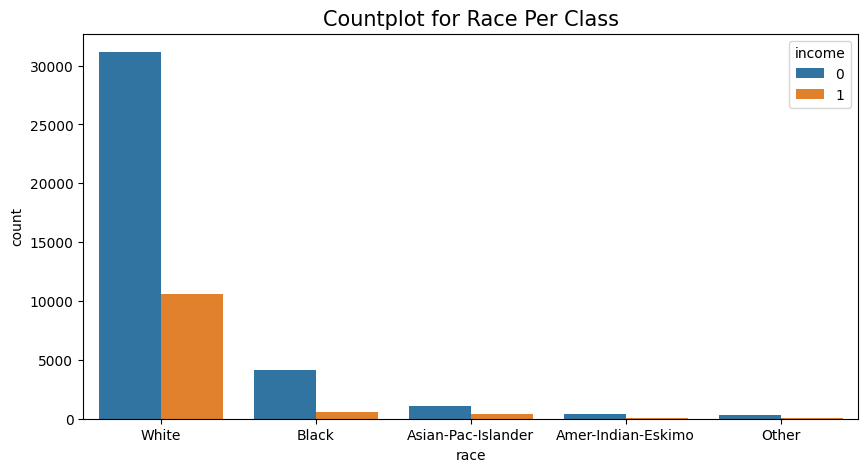

In [49]:
plt.figure(figsize=[10,5])
sns.countplot(x='race', hue='income', data=df)
plt.title('Countplot for Race Per Class', fontsize = 15)

In this dataset majority of information about white race is more while all other races are lesser.

## Country

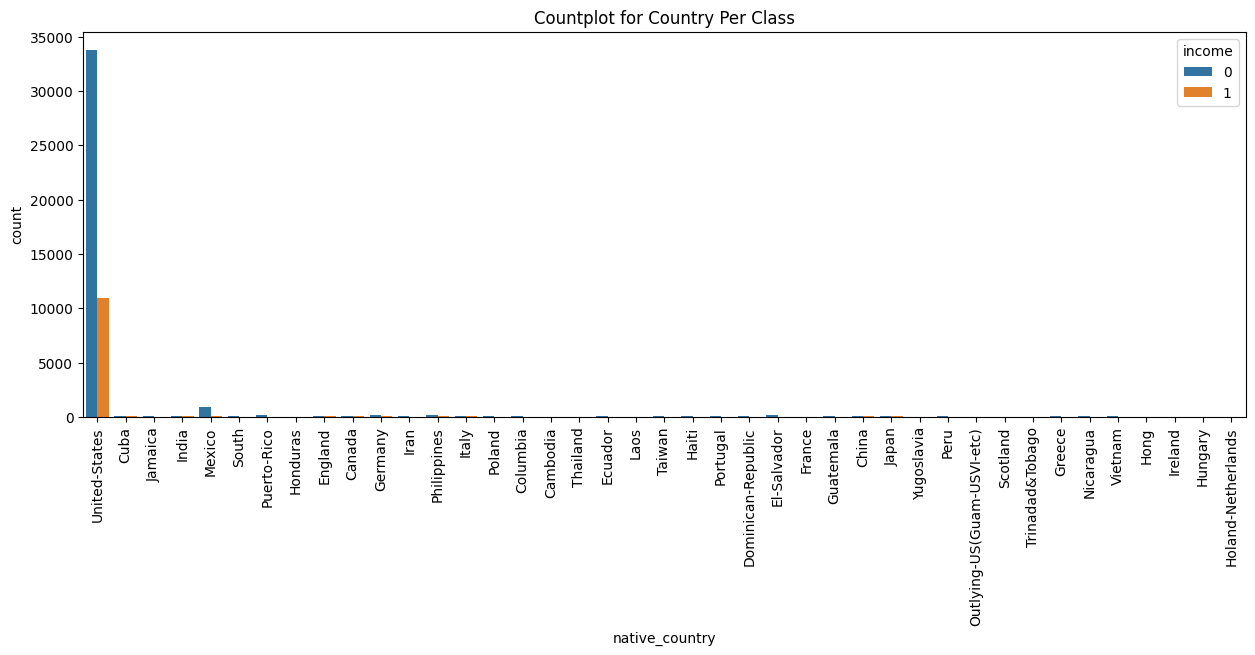


 --Value Counts-- 

native_country
United-States                 44688
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [50]:
plt.figure(figsize=[15,5])
sns.countplot(x='native_country',hue='income', data=df)
plt.title('Countplot for Country Per Class', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['native_country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(df[df['native_country']=='United-States'])/48841*100,2)))

print('{}% people belong from other country.'
      .format(round(len(df[df['native_country']!='United-States'])/48841*100,2)))

* From analysis above, 91.5% peoples are from United-states and only 8.5% people belong from other countries.
* And There are 41 countries in this column, so it's better if we transform this feature with value as either United States or Other

In [51]:
# Data Handling: Transforming native country column with value as either United States or Other.
countries = df['native_country'].unique()[1:]
df['native_country'] = df['native_country'].replace(to_replace=countries, value='Other')

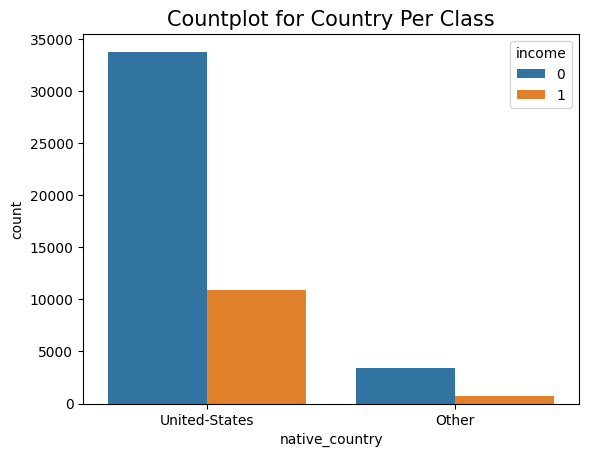

In [52]:
# Sanity Check after Data Handling
# Countplot for Country Per Class
sns.countplot(x='native_country', hue='income', data=df)
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

## Occupation

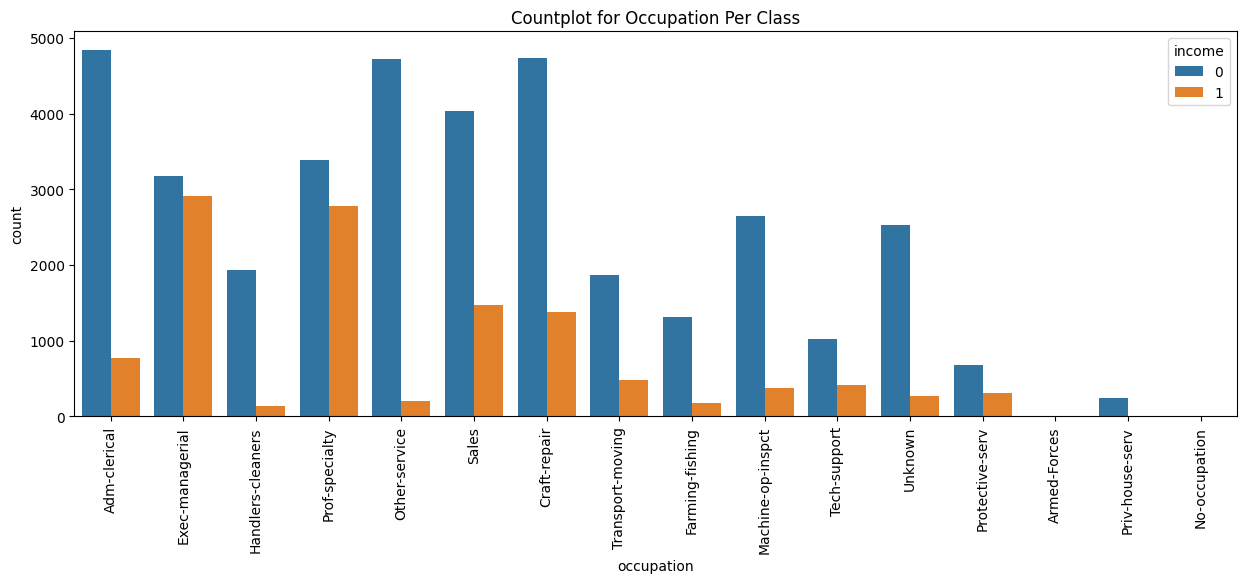

In [53]:
plt.figure(figsize=[15,5])
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Countplot for Occupation Per Class', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In occupation column the values are well distributed in all categories

## Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

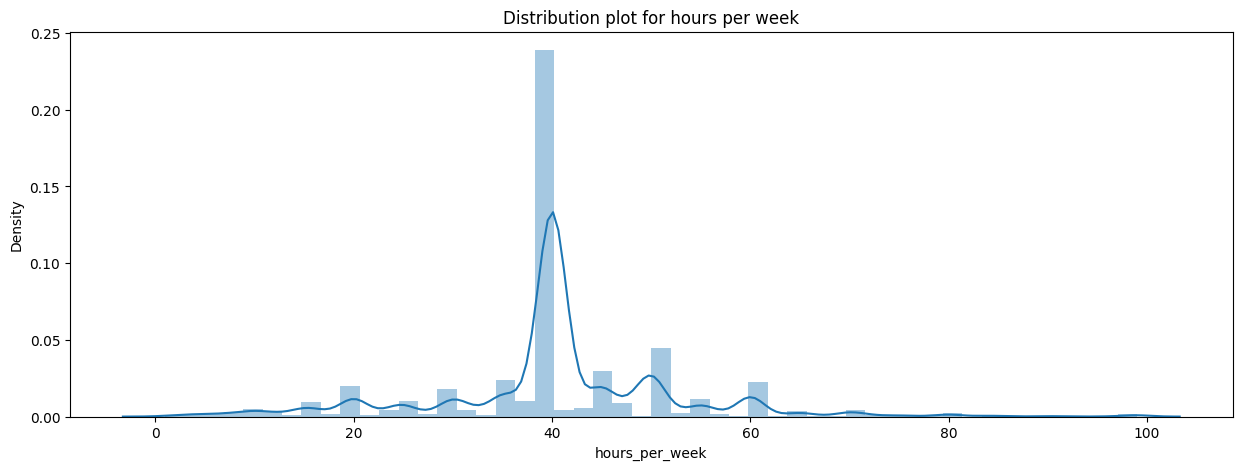

In [54]:
# Distribution plot for hours per week column
plt.figure(figsize=[15,5])
sns.distplot(df['hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 12)

* By looking distribution plot for hours per weak column our data is aligned around the centre.
* In this dataset most of the people work 30 to 40 hours per week

# Dealing with Categorical Variables

In [55]:
# Categorical features
cat_df = df.select_dtypes(include=['object']) # categorical data -> type:object
num_df = df.select_dtypes(include=['int64']) # numerical data -> type:integer

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status : ['not married' 'married'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' 'No-occupation'] 

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native_country : ['United-States' 'Other'] 



- Mengeksplorasi Nilai Unik: Loop digunakan untuk mengiterasi setiap kolom di cat_df dan mencetak semua nilai unik yang ada di dalamnya. Ini adalah langkah penting untuk memahami keragaman data dan mengidentifikasi potensi masalah seperti typo atau inkonsistensi.

In [56]:
# Creating dummies variables
df_dummie = pd.get_dummies(df,drop_first=True)
df_dummie.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_United-States
0,39,77516,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,50,83311,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,38,215646,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,True,True
3,53,234721,0,0,40,0,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
4,28,338409,0,0,40,0,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


`pd.get_dummies()`
--
- Fungsi ini mengonversi variabel kategorikal (non-numerik, seperti 'Private' atau 'Female') menjadi serangkaian kolom biner (dummy/indikator).
Setiap nilai unik dalam kolom asli menjadi `kolom baru` yang berisi `True (atau 1) atau False (atau 0).`

`Parameter drop_first=True`
--
- Parameter ini sangat penting dalam analisis statistik dan machine learning. Ini menginstruksikan pandas untuk menghapus kolom dummy pertama yang dibuat untuk setiap variabel kategorikal asli.
- Tujuan utama adalah untuk menghindari masalah multikolinieritas (multicollinearity), di mana satu kolom dapat diprediksi dengan sempurna dari kolom lainnya.
- Contoh: Untuk kolom sex dengan nilai 'Male' dan 'Female', `get_dummies() tanpa drop_first` akan menghasilkan sex_Female dan sex_Male. Jika sex_Female bernilai False, kita sudah tahu pasti itu pasti sex_Male bernilai True.
- Dengan `drop_first=True`, hanya satu kolom yang dipertahankan (misalnya sex_Female). Jika nilainya True, itu 'Female'; jika False, itu 'Male'. Tidak ada informasi yang hilang, tetapi jumlah fitur berkurang dan model linier bekerja lebih baik.

In [57]:
# Sanity Check
print("Total No. of features after creating dummie variable : {}\n".format(len(df_dummie.columns)))
print('--Features--\n')
for i in df_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 56

--Features--

age
fnlwgt
capital_gain
capital_loss
hours_per_week
income
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Unknown
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital_status_not married
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_No-occupation
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
occupation_Unknown
relationship

# Feature selection

In [58]:
from sklearn.preprocessing import LabelEncoder
temp_df = df.copy()
for col in temp_df.columns:
    if temp_df[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_df[col] = encoder.fit_transform(temp_df[col])

# Fitur yang berkorelasi dengan variabel target
print('\n--Correated Features with target variable--\n')
print(abs(temp_df.corrwith(temp_df['income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

marital_status    0.436619
relationship      0.253206
age               0.230361
hours_per_week    0.227687
capital_gain      0.223012
sex               0.214638
capital_loss      0.147553
education         0.080068
race              0.070915
workclass         0.054682
native_country    0.037981
occupation        0.007732
fnlwgt            0.006335
dtype: float64


Label Encoding
--
- Menggunakan `LabelEncoder dari sklearn.preprocessing`, kode ini **mengubah semua kolom bertipe data object (kategorikal)** ->  menjadi representasi numerik integer (misalnya, 0, 1, 2, dst.).
- Ini dilakukan pada salinan DataFrame bernama `temp_df`.
- Perhitungan Korelasi: Setelah semua data menjadi numerik, kode ini menghitung korelasi pasangan (pairwise correlation) antara setiap fitur dengan variabel target income menggunakan `corrwith() dari pandas`.

Analisis Hasil
--
- Nilai korelasi absolut `(abs())` kemudian diurutkan dari yang tertinggi ke terendah `(sort_values(ascending=False))`,
- Mengecualikan korelasi variabel dengan dirinya sendiri `([1:])`. Output ini membantu mengidentifikasi fitur mana yang paling relevan dengan variabel target income (misalnya, marital_status dan relationship memiliki korelasi absolut tertinggi sekitar 0.43 dan 0.25).

Insights
--
- Proses ini membantu mengurangi kompleksitas model dan meningkatkan akurasi dengan `berfokus pada fitur-fitur yang paling berpengaruh`.

## Correlation Heatmap

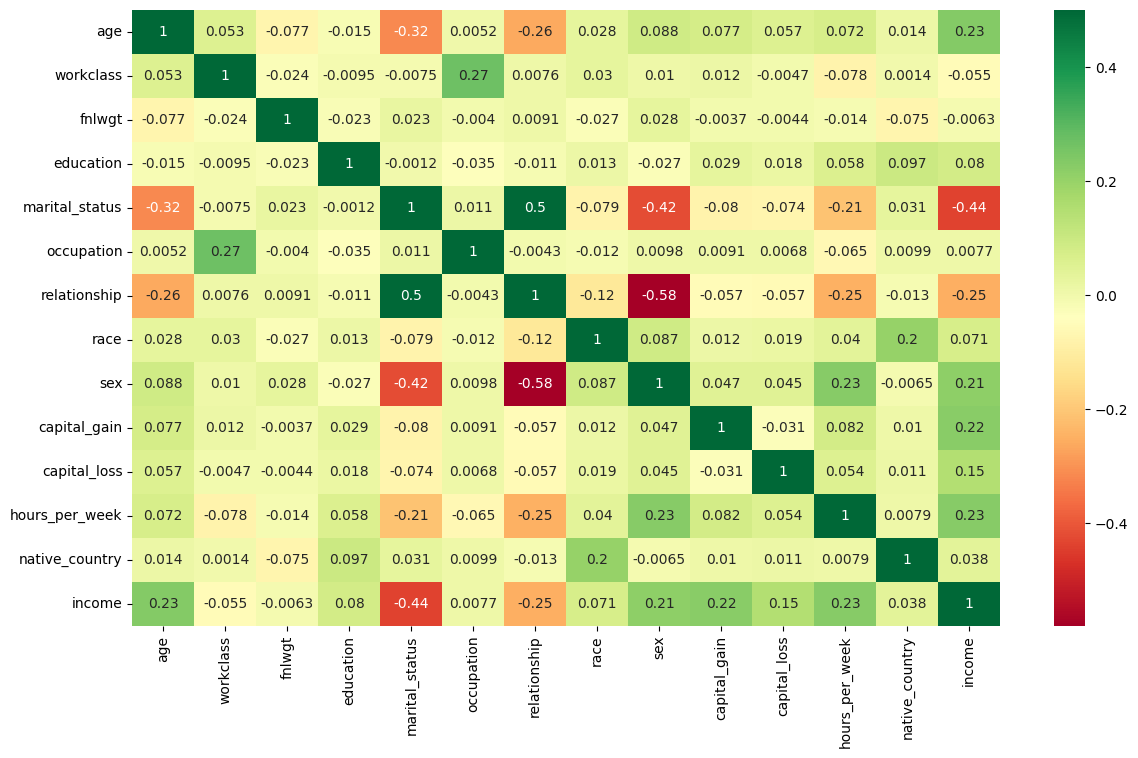

In [59]:
plt.figure(figsize=[14,8])
sns.heatmap(temp_df.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [60]:
# Handling: Droping those features which we are not going to use
final_features = df_dummie.drop(['fnlwgt','workclass_Local-gov', 'workclass_Never-worked','workclass_Private',
                                         'workclass_Self-emp-inc','workclass_Self-emp-not-inc', 'workclass_State-gov',
                                         'workclass_Without-pay'], axis=1)

Kode `final_features = df_dummie.drop([...], axis=1)` penting karena melakukan seleksi fitur, yang sangat penting untuk membangun model pembelajaran mesin yang efektif.

Berikut alasan mengapa kolom-kolom spesifik tersebut dihilangkan:
--

- `fnlwgt (Final Weight):` Kolom ini biasanya mewakili bobot sampel statistik yang diberikan kepada setiap individu dalam dataset. Ini sering digunakan dalam analisis survei untuk membuat sampel representatif terhadap populasi. Untuk pemodelan prediktif, fnlwgt umumnya bukan fitur prediktif untuk pendapatan individu dan dapat menyesatkan atau menambah noise jika disertakan. Oleh karena itu, praktik umum adalah menghapusnya.

- `Multiple workclass_ dummy variables`:
`pd.get_dummies(df, drop_first=True)`. Ini secara otomatis menghapus satu kategori untuk setiap kolom kategorikal asli (untuk menghindari multikolinearitas, di mana satu kategori dapat diprediksi dengan sempurna oleh kategori lain).

- Keputusan untuk menghapus lebih lanjut variabel dummy kelas kerja tertentu (seperti 'workclass_Local-gov', 'workclass_Never-worked', dll.) menunjukkan pilihan yang disengaja untuk:
  - `Mengurangi dimensi dan kompleksitas:` Mengkonsolidasikan informasi dari banyak kategori kelas kerja menjadi lebih sedikit kategori yang lebih bermakna atau berfokus pada garis dasar tertentu dan kategori 'Tidak Diketahui'.

  - `Menghapus fitur yang kurang prediktif:` Beberapa kategori kelas kerja mungkin memiliki sangat sedikit titik data atau menunjukkan sedikit korelasi dengan pendapatan, sehingga kurang bermanfaat bagi model.

  - `Berfokus pada kategori yang relevan:` Dengan menghapus kategori-kategori ini, model mungkin secara implisit berfokus pada kategori kelas kerja yang tersisa (kemungkinan 'Federal-gov' dan 'Tidak Diketahui' berdasarkan daftar, ditambah garis dasar implisit) sebagai pembeda yang paling menonjol untuk prediksi pendapatan.

In [61]:
print(final_features.columns.tolist())

['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'income', 'workclass_Unknown', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital_status_not married', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_No-occupation', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',

# Model Development

## Declaring `dependent (y, target)` and `independent variable (X, features)`

In [62]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

## Feature Scaling

In [63]:
# Feature scaling on df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])

StandardScaler()

- StandardScaler Numerical Columns: Menggunakan metode .fit() pada objek scaler dengan hanya menyertakan kolom-kolom numerik tertentu: `age, capital_gain, capital_loss, dan hours_per_week.`
- Cara Kerja StandardScaler: StandardScaler mengubah data sedemikian rupa sehingga distribusi setiap fitur memiliki rata-rata nol (mean=0) dan standar deviasi satu (standard deviation=1). Proses ini dilakukan dengan formula:
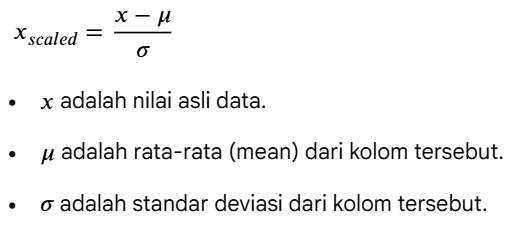

- Proses penskalaan ini sangat penting untuk banyak algoritma machine learning karena beberapa algoritma cenderung berkinerja lebih baik ketika fitur input berada pada skala yang sama.


In [64]:
input_scaled = scaler.transform(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital_gain', 'capital_loss', 'hours_per_week'])

Mengaplikasikan Transformasi (Baris 1)
--
`input_scaled = scaler.transform(X[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])`

  - `scaler.transform(...):` menskalakan data pada kolom age, capital_gain, capital_loss, dan hours_per_week dalam DataFrame X saat ini.
  - Output `input_scaled` adalah sebuah array NumPy (bukan DataFrame pandas lagi) yang berisi nilai-nilai yang telah distandardisasi, yang kini memiliki rata-rata nol dan standar deviasi satu.

Mengkonversi Kembali Menjadi DataFrame (Baris 2)
--
`scaled_data = pd.DataFrame(input_scaled, columns=['age', 'capital_gain', 'capital_loss', 'hours_per_week'])`

  - `pd.DataFrame(...):` Mengonversi kembali array NumPy input_scaled menjadi DataFrame pandas.
  - `columns=[...]:` Memastikan DataFrame baru tersebut memiliki nama kolom yang sama dengan kolom aslinya untuk menjaga kejelasan data.

---

Kode ini sangat penting dalam alur kerja machine learning karena memastikan penskalaan diterapkan secara konsisten.

In [65]:
# Ensure X and y have a clean, unique, and contiguous RangeIndex
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Apply StandardScaler only to numerical columns in X
numerical_cols = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()

# Create X_scaled by copying X and then scaling the numerical columns in place
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

Penanganan indeks dan Penskalaan fitur numerik.
--

- Penanganan Indeks (Baris 1-3)
`X.reset_index(drop=True) dan y.reset_index(drop=True):`
  - Baris ini memastikan bahwa DataFrame fitur (X) dan seri target (y) memiliki indeks yang bersih, unik, dan berurutan secara kontinu (0, 1, 2, ...). Parameter drop=True memastikan indeks lama tidak ditambahkan sebagai kolom baru.
  
- Inisialisasi StandardScaler (Baris 5-7)
`numerical_cols = [...]:`
  - Mendefinisikan daftar nama kolom yang berisi data numerik yang perlu diukur skalanya.
`scaler = StandardScaler():`
  - Menginisialisasi objek StandardScaler dari pustaka scikit-learn. Objek ini akan digunakan untuk mentransformasi data.
  
- Penerapan Penskalaan (Baris 9-11)
`X_scaled = X.copy():`
  - Membuat salinan DataFrame fitur asli untuk menghindari modifikasi data mentah secara langsung.
  
`X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols]):`    Baris kunci yang melakukan dua hal sekaligus:
  - `.fit_transform()`: Metode ini menghitung rata-rata dan standar deviasi dari kolom numerik dan segera menerapkan transformasi penskalaan tersebut pada kolom yang dipilih.
  - Hasilnya, kolom age, capital_gain, capital_loss, dan hours_per_week dalam X_scaled sekarang telah distandardisasi.

## Fixing imbalanced dataset


RandomOverSampler

In [66]:
# Fixing imbalanced dataset by oversampling
from imblearn.over_sampling import RandomOverSampler
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled,y)

1. Overview:
    - Langkah ini sangat baik dan penting jika menghadapi dataset yang tidak seimbang (imbalanced dataset), di mana satu kelas target jauh lebih sering muncul daripada kelas lainnya (seperti jumlah orang berpenghasilan <=50K jauh lebih banyak daripada >50K).
2. `RandomOverSampler():`
    - Menginisialisasi teknik Oversampling secara acak. Ini adalah metode untuk menyeimbangkan dataset setelah memisahkan `fitur (X)` dan `target (y)`.
3. `rd_over_sample.fit_sample(X_scaled, y):`
    - Algoritma ini melihat kelas minoritas (misalnya, yang berpenghasilan >$50K).
    - Kemudian menduplikat secara acak sampel yang ada dari kelas minoritas tersebut.
    - Tujuannya adalah membuat jumlah data di kelas minoritas sama dengan jumlah data di kelas mayoritas.
4. Kesimpulan:
    - Dengan melakukan `oversampling` -> mencegah model Machine Learning mengabaikan kelas minoritas dan meningkatkan performa prediksinya untuk kedua kelompok pendapatan.

In [67]:
# Sanity Check
print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

Before sampling : 
income
0    37154
1    11687
Name: count, dtype: int64

After sampling : 
income
0    37154
1    37154
Name: count, dtype: int64


## Training and Testing Data

In [68]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

# Machine Learning Algorithm

## Logistic Regression Model

In [69]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [70]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr), 2))
print('F1 score:', round(f1_score(y_test, y_pred_lr), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 2))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.82
F1 score: 0.82

-----Train Data Accuracy----
Accuracy score: 0.82
F1 score: 0.82


## Decision Tree Classifier

In [71]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)

# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [72]:
print("-----Test Data Accuracy----")
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 2))
print('F1 score:', round(f1_score(y_test, y_pred_dt), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_dt), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_dt), 2))

-----Test Data Accuracy----
Decision Tree Classifier:
Accuracy score: 0.82
F1 score: 0.82

-----Train Data Accuracy----
Accuracy score: 0.83
F1 score: 0.83


## Random Forest Classifier

In [73]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [74]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 2))
print('F1 score:', round(f1_score(y_test, y_pred_rfc), 3))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 2))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.82
F1 score: 0.903

-----Train Data Accuracy----
Accuracy score: 0.94
F1 score: 0.94


## GradientBoosting Classifier

In [75]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)

# Training Model
gbtc.fit(x_train,y_train)

# Model summary
y_pred_gbtc = gbtc.predict(x_test)
y_pred_train_gbtc = gbtc.predict(x_train)

In [76]:
print("-----Test Data Accuracy----")
print('GradientBoostingClassifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gbtc), 2))
print('F1 score:', round(f1_score(y_test, y_pred_gbtc), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_gbtc), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_gbtc), 2))

-----Test Data Accuracy----
GradientBoostingClassifier:
Accuracy score: 0.83
F1 score: 0.84

-----Train Data Accuracy----
Accuracy score: 0.84
F1 score: 0.84


## XGBoost Classifier

In [77]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [78]:
print("-----Test Data Accuracy----")
print('XGB Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_xgb), 2))
print('F1 score:',round(f1_score(y_test, y_pred_xgb), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_xgb),2))
print('F1 score:',round(f1_score(y_train, y_pred_train_xgb), 2))

-----Test Data Accuracy----
XGB Classifier:
Accuracy score: 0.86
F1 score: 0.86

-----Train Data Accuracy----
Accuracy score: 0.87
F1 score: 0.87


# Evaluating Model Selection

In [79]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

models.append(('XGBoost Classifier', XGBClassifier(random_state=0)))

models.append(('GradientBoosting Classifier', GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)))

In [80]:
#Evaluating Model Results:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, x_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, x_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,95.69,0.25,89.72,0.28
3,XGBoost Classifier,93.76,0.22,85.70,0.45
4,GradientBoosting Classifier,91.92,0.34,83.35,0.58
1,Decision Tree Classifier,91.64,0.35,88.78,0.31
0,Logistic Regression,90.38,0.37,81.90,0.48


# Hyperparameter Optimization

## XGB Tune

In [81]:
# XGB Classifier Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [82]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [83]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [84]:
# Again Training our model with best parameter
xgb_tune = XGBClassifier(random_state=0,min_child_weight=3,max_depth= 15,
                    learning_rate = 0.1,gamma= 0.1,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

### Analysing Results: XGB Tune

In [85]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 2))
print('F1 score:', round(f1_score(y_test, y_pred_xgb_tune), 2))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.87
F1 score: 0.87


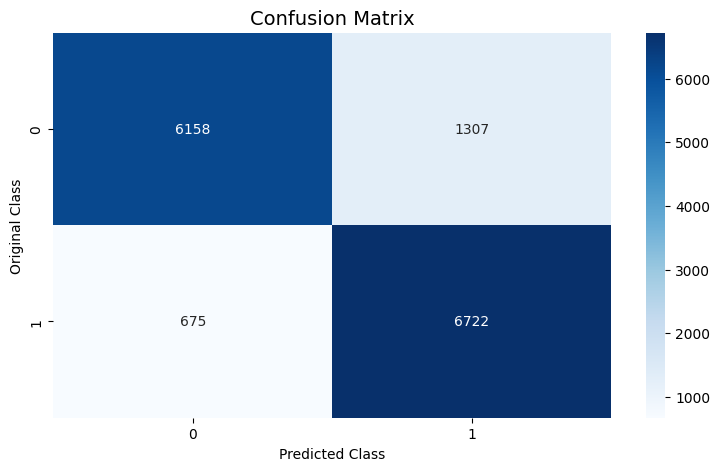

In [86]:
# Plot confusion matrix
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tune), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

Interpretasi Confusion Matrix XGB Tune
* `True Negative (TN) - 6159`: Jumlah kasus di mana kelas aktual adalah 0, dan model berhasil memprediksi 0. Ini adalah prediksi negatif yang benar.
* `False Positive (FP) - 1306`: Jumlah kasus di mana kelas aktual adalah 0, tetapi model salah memprediksi 1. Ini sering disebut "Type I error".
* `False Negative (FN) - 675`: Jumlah kasus di mana kelas aktual adalah 1, tetapi model salah memprediksi 0. Ini sering disebut "Type II error".
* `True Positive (TP) - 6722`: Jumlah kasus di mana kelas aktual adalah 1, dan model berhasil memprediksi 1. Ini adalah prediksi positif yang benar.

Analisis Performa Model XGB Tune
* `Akurasi (Overall Accuracy)`: Model ini tampak cukup akurat secara keseluruhan, karena nilai diagonal (TN dan TP) jauh lebih besar daripada nilai off-diagonal (FP dan FN). Total prediksi benar adalah 6208 + 6778 = 12986. Total data adalah 12986 + 1257 + 619 = 14862. Akurasinya sekitar 87.3%.
* `Error`: Model ini melakukan lebih banyak kesalahan dalam memprediksi kelas 0 (1257 FP) daripada kesalahan dalam memprediksi kelas 1 (619 FN).

In [87]:
# Classificaton Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7465
           1       0.84      0.91      0.87      7397

    accuracy                           0.87     14862
   macro avg       0.87      0.87      0.87     14862
weighted avg       0.87      0.87      0.87     14862



General Overview XGB Tune
* Output dari classification_report adalah evaluasi terperinci mengenai kinerja model klasifikasi, dalam hal ini model XGBoost `(y_pred_xgb_tune)`, pada data pengujian `(y_test)`.
* Laporan ini membagi performa menjadi beberapa metrik kunci untuk setiap kelas
---
Penjelasan Metrik
* `Precision (Presisi)`: Menjawab pertanyaan, "Dari semua yang diprediksi model sebagai kelas positif.
* `Recall (Sensitivitas)`: Menjawab pertanyaan, "Dari semua kasus positif yang sebenarnya ada.
* `F1-Score`: Rata-rata dari Precision dan Recall. Metrik ini sangat berguna untuk memberikan skor tunggal yang seimbang, terutama pada dataset yang mungkin tidak seimbang.
* `Support`: Jumlah aktual kemunculan kelas tersebut dalam data pengujian (y_test).
---
Interpretasi Hasil
* `Akurasi Keseluruhan (accuracy)`: 0.87 (87%) dari semua prediksi model adalah benar.
* Model sangat baik dalam mengenali kelas 0 (presisi 91%), namun sedikit
* Sebaliknya, model sangat baik dalam menangkap semua kejadian kelas 1 (recall 92%), tetapi melakukan sedikit lebih banyak kesalahan positif untuk kelas tersebut (presisi 84%).
* Nilai `macro avg` dan `weighted avg` yang tinggi menunjukkan bahwa model bekerja konsisten dengan baik di kedua kelas dan dataset cukup seimbang (terlihat dari nilai support yang mirip).

ROC Curve XGB Tune

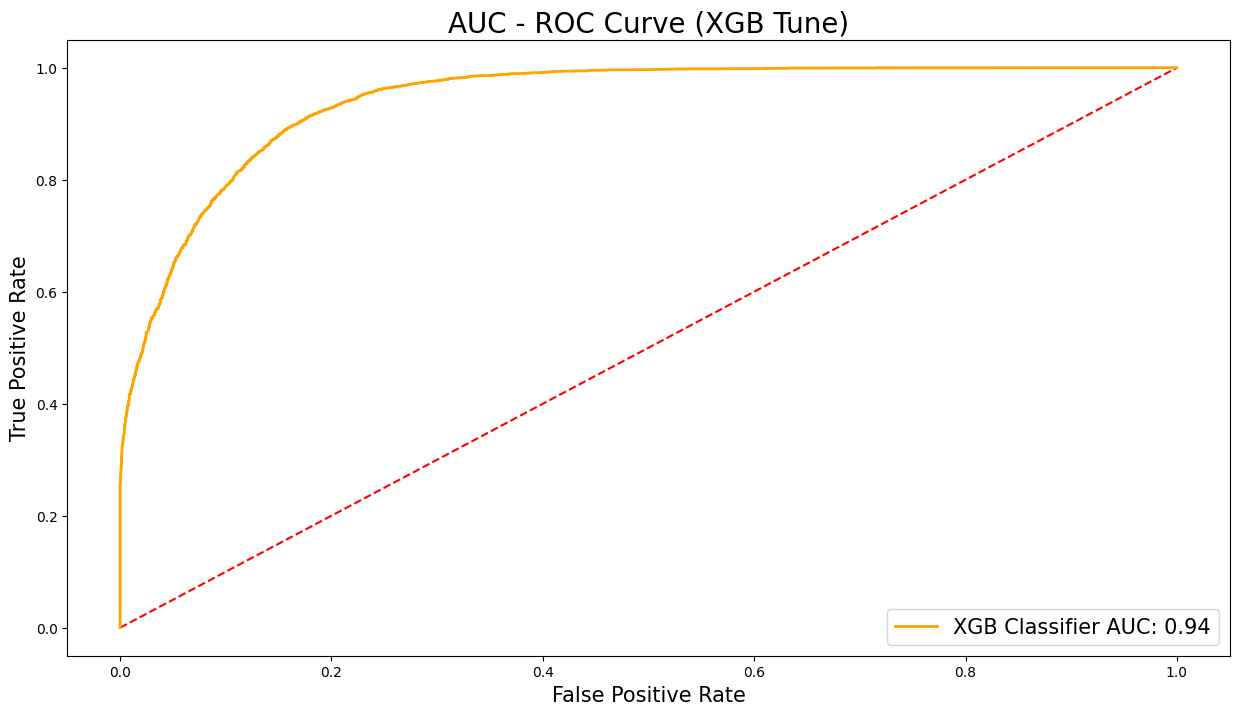

In [88]:
# Plot Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)

# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'XGB Classifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('AUC - ROC Curve (XGB Tune)', fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)
plt.show()

Kesimpulan XGB Tune


* Setelah mencoba berbagai algoritma klasifikasi, `XGBoost Classifier` memberikan performa terbaik dengan skor `F1 0.88,  AUC 0.95, dan akurasi 0.87`.
* Telah dilakukan hyperparameter tuning pada `XGBoost` untuk mendapatkan parameter yang optimal.
* Beberapa metrik performa digunakan untuk memastikan model berjalan dengan benar dan tidak overfitting.
* Analisis data awal menunjukkan bahwa mayoritas responden berusia muda, tetapi relatif sedikit dari mereka yang berpenghasilan `>$50K` per tahun.
* Karakteristik umum populasi dataset ini adalah muda, berkulit putih, laki-laki, lulusan SMA (9-10 tahun pendidikan), bekerja 40 jam per minggu, dan berasal dari Amerika Serikat.

### XGB Tune: Save Model & Data Scaler to reuse it again

In [89]:
'''
# Save Model and Data Scaler
from pickle import dump
from pickle import load

# save the model
dump(xgb, open('xgb_model.pkl', 'wb'))

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
'''

"\n# Save Model and Data Scaler\nfrom pickle import dump\nfrom pickle import load\n\n# save the model\ndump(xgb, open('xgb_model.pkl', 'wb'))\n\n# save the scaler\ndump(scaler, open('scaler.pkl', 'wb'))\n"

In [90]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 121.2 MB/s eta 0:00:00


In [91]:
'''
!pip install streamlit
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Used for clarity, although scaler is loaded

# Load the trained XGBoost model and scaler
try:
    xgb_model = pickle.load(open('xgb_model.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))
except FileNotFoundError:
    st.error("Model or scaler file not found. Please ensure 'xgb_model.pkl' and 'scaler.pkl' are in the same directory.")
    st.stop()

# Define the expected columns for the model input (X) in the exact order
# This list is crucial for consistency with the trained model's feature set.
model_columns = [
    'age', 'capital_gain', 'capital_loss', 'hours_per_week',
    'workclass_Unknown', 'education_11th', 'education_12th', 'education_1st-4th',
    'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
    'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
    'education_HS-grad', 'education_Masters', 'education_Preschool',
    'education_Prof-school', 'education_Some-college', 'marital_status_not married',
    'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial',
    'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
    'occupation_Machine-op-inspct', 'occupation_No-occupation', 'occupation_Other-service',
    'occupation_Priv-house-serv', 'occupation_Prof-specialty',
    'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support',
    'occupation_Transport-moving', 'occupation_Unknown', 'relationship_Not-in-family',
    'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried',
    'relationship_Wife', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
    'race_White', 'sex_Male', 'native_country_United-States'
]

# Numerical columns that need scaling
numerical_cols = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

# Categorical columns used for one-hot encoding (original column names)
categorical_cols = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country'
]

st.title("Income Prediction App")
st.write("Predict if an individual's income is >50K or <=50K based on their characteristics.")

st.sidebar.header("User Input Features")

def user_input_features():
    # Input widgets for each feature
    age = st.sidebar.slider('Age', 17, 90, 30)
    workclass = st.sidebar.selectbox('Workclass', ['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'])
    education = st.sidebar.selectbox('Education', ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', '9th', 'Prof-school', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'])
    marital_status = st.sidebar.selectbox('Marital Status', ['not married', 'married'])
    occupation = st.sidebar.selectbox('Occupation', ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Unknown', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'No-occupation'])
    relationship = st.sidebar.selectbox('Relationship', ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'])
    race = st.sidebar.selectbox('Race', ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
    sex = st.sidebar.selectbox('Sex', ['Male', 'Female'])
    capital_gain = st.sidebar.number_input('Capital Gain', 0, 99999, 0)
    capital_loss = st.sidebar.number_input('Capital Loss', 0, 4356, 0)
    hours_per_week = st.sidebar.slider('Hours per Week', 1, 99, 40)
    native_country = st.sidebar.selectbox('Native Country', ['United-States', 'Other'])

    data = {
        'age': age,
        'workclass': workclass,
        'education': education,
        'marital_status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'sex': sex,
        'capital_gain': capital_gain,
        'capital_loss': capital_loss,
        'hours_per_week': hours_per_week,
        'native_country': native_country
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df_raw = user_input_features()

# Preprocessing user input to match model's training data
def preprocess_input_for_model(df_raw):
    # Create a temporary DataFrame with numerical and pre-transformed categorical inputs
    processed_df = df_raw.copy()

    # Apply one-hot encoding to categorical columns, ensuring drop_first=True is consistent with training
    processed_df_dummies = pd.get_dummies(processed_df, columns=categorical_cols, drop_first=True)

    # Explicitly drop workclass columns that were dropped in the notebook
    # This ensures consistency with the `final_features` DataFrame from training
    workclass_cols_to_drop = [
        'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
        'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
        'workclass_State-gov', 'workclass_Without-pay'
    ]
    for col in workclass_cols_to_drop:
        if col in processed_df_dummies.columns:
            processed_df_dummies = processed_df_dummies.drop(columns=[col])

    # Convert any boolean columns (from get_dummies) to integer (0 or 1)
    for col in processed_df_dummies.columns:
        if processed_df_dummies[col].dtype == 'bool':
            processed_df_dummies[col] = processed_df_dummies[col].astype(int)

    # Reindex to ensure all model columns are present and in the exact order
    # Any missing columns will be added and filled with 0 (which is appropriate for dummy variables)
    final_input_df = processed_df_dummies.reindex(columns=model_columns, fill_value=0)

    # Scale numerical features using the loaded scaler
    final_input_df[numerical_cols] = scaler.transform(final_input_df[numerical_cols])

    return final_input_df

# Predict button
if st.sidebar.button('Predict Income'):
    # Preprocess the raw user input
    processed_input = preprocess_input_for_model(input_df_raw)

    # Make prediction using the loaded XGBoost model
    prediction = xgb_model.predict(processed_input)
    prediction_proba = xgb_model.predict_proba(processed_input)

    st.subheader('Prediction')
    income_level = ":green[**Income >50K**]" if prediction[0] == 1 else ":red[**Income <=50K**]"
    st.write(f"The predicted income level is: {income_level}")

    st.subheader('Prediction Probability')
    st.write(f"Probability of Income <=50K: {prediction_proba[0][0]:.2f}")
    st.write(f"Probability of Income >50K: {prediction_proba[0][1]:.2f}")
    '''

'\n!pip install streamlit\nimport streamlit as st\nimport pickle\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import StandardScaler # Used for clarity, although scaler is loaded\n\n# Load the trained XGBoost model and scaler\ntry:\n    xgb_model = pickle.load(open(\'xgb_model.pkl\', \'rb\'))\n    scaler = pickle.load(open(\'scaler.pkl\', \'rb\'))\nexcept FileNotFoundError:\n    st.error("Model or scaler file not found. Please ensure \'xgb_model.pkl\' and \'scaler.pkl\' are in the same directory.")\n    st.stop()\n\n# Define the expected columns for the model input (X) in the exact order\n# This list is crucial for consistency with the trained model\'s feature set.\nmodel_columns = [\n    \'age\', \'capital_gain\', \'capital_loss\', \'hours_per_week\',\n    \'workclass_Unknown\', \'education_11th\', \'education_12th\', \'education_1st-4th\',\n    \'education_5th-6th\', \'education_7th-8th\', \'education_9th\', \'education_Assoc-acdm\',\n    \'education_Assoc-voc\

### XGB Tune: Load Model and Data Scaler

In [92]:
'''
import pickle
# load the model
model = pickle.load(open('xgb_model.pkl', 'rb'))
# load the scaler
scalers = pickle.load(open('scaler.pkl', 'rb'))
'''

"\nimport pickle\n# load the model\nmodel = pickle.load(open('xgb_model.pkl', 'rb'))\n# load the scaler\nscalers = pickle.load(open('scaler.pkl', 'rb'))\n"

# Best Metric => Specific goals of The Prediction

Precision:
--
  - This answers:  "Dari semua orang yang diprediksi model memiliki pendapatan >50K, berapa banyak yang sebenarnya memiliki pendapatan >50K?" Presisi tinggi untuk kelas >50K berarti lebih sedikit false positive.

  - When it's important: Jika cost False Positive (salah memprediksi >50K padahal sebenarnya <=50K) tinggi. Misalnya, jika ingin menawarkan layanan eksklusif bernilai tinggi hanya kepada individu berpenghasilan tinggi, Anda ingin sangat yakin dengan prediksi Anda untuk menghindari pemborosan sumber daya atau kehilangan calon klien.

Recall (Sensitivity):
--
  - This answers: "Dari semua orang yang benar-benar memiliki pendapatan >50K, berapa banyak yang berhasil diidentifikasi dengan benar oleh model?" Tingkat recall yang tinggi untuk kelas >50K berarti lebih sedikit false negative.

  - When it's important: Jika cost dari False Negative (salah memprediksi <=50K padahal sebenarnya >50K) tinggi. Misalnya, jika ingin memastikan tidak kehilangan pelanggan potensial berpenghasilan tinggi untuk kampanye pemasaran, maka akan memprioritaskan recall yang tinggi.

F1-Score:
--
  - Objective: Ini adalah rata - rata paling seimbang dari Presisi dan Recall. Ini memberikan skor tunggal yang menyeimbangkan kedua metrik tersebut. Ini sangat berguna ketika memiliki dataset yang tidak seimbang, seperti dalam kasus ini (76,07% <= 50K vs 23,93% > 50K).
  - Akurasi dapat menyesatkan dalam kasus seperti ini karena sebuah model dapat mencapai akurasi tinggi hanya dengan memprediksi kelas mayoritas sepanjang waktu.

  - When it's important: Saat membutuhkan keseimbangan antara mengidentifikasi kasus positif dengan benar dan tidak salah mengklasifikasikan kasus negatif. Ini sering kali menjadi metrik yang lebih disukai ketika baik False Positives maupun False Negatives tidak diinginkan dan diperlukannya ukuran kinerja keseluruhan yang baik, terutama pada kelompok minoritas.


In income prediction model:
--
Mengingat ketidakseimbangan kelas, skor F1 umumnya merupakan metrik yang paling kuat untuk dievaluasi, karena memberikan pandangan yang seimbang tentang kinerja model pada kedua kelas pendapatan. Namun, harus mempertimbangkan juga tujuan spesifik project machine learningnya:

- Jika prioritas dari awal untuk menghindari kesalahan identifikasi seseorang sebagai berpenghasilan tinggi, fokuslah pada Precision untuk kelas >50K.

- Sebaliknya, jika yang lebih penting untuk menangkap sebanyak mungkin individu berpenghasilan tinggi, fokuslah pada Recall untuk kelas >50K.
---
Fakta bahwa step evaluasi hingga telah menentukan model sedemikian rupa dan mengevaluasinya menggunakan skor F1 (dan AUC-ROC, yang juga bagus untuk data yang tidak seimbang) menunjukkan bahwa kita berada di jalur yang benar untuk jenis masalah (prediction project) ini!

## Random Forest Tune

In [93]:
params={
 "n_estimators"     : [100, 200, 300],
 "max_depth"        : [5, 10, 15, 20, 30, None],
 "min_samples_split": [2, 5, 10],
 "min_samples_leaf" : [1, 2, 4],
 "max_features"     : ['sqrt', 'log2', 0.6, 0.8, 1.0],
 "criterion"        : ['gini', 'entropy']
}

classifier=RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [94]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 0.6,
                                                         0.8, 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [95]:
# Again Training our model with best parameter
rfc_tune = RandomForestClassifier(random_state=0, **random_search.best_params_)
rfc_tune.fit(x_train,y_train)
y_pred_rfc_tune = rfc_tune.predict(x_test)

### Analysing Results: RFC Tune

In [96]:
print("-----Test Data Accuracy----")
print('RFC Tune:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rfc_tune), 2))
print('F1 score:', round(f1_score(y_test, y_pred_rfc_tune), 2))

-----Test Data Accuracy----
RFC Tune:
Accuracy score: 0.85
F1 score: 0.85


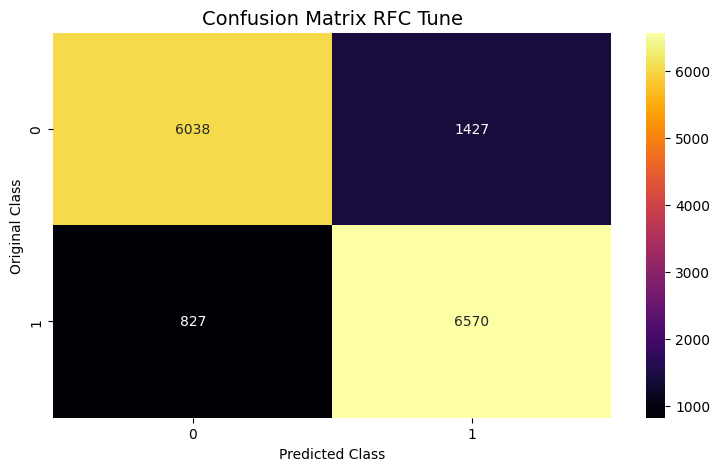

In [97]:
# Plot confusion matrix for rfc_tune
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_rfc_tune), annot=True, fmt='d', cmap='inferno')
plt.title('Confusion Matrix RFC Tune', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### ROC Curve RFC Tune

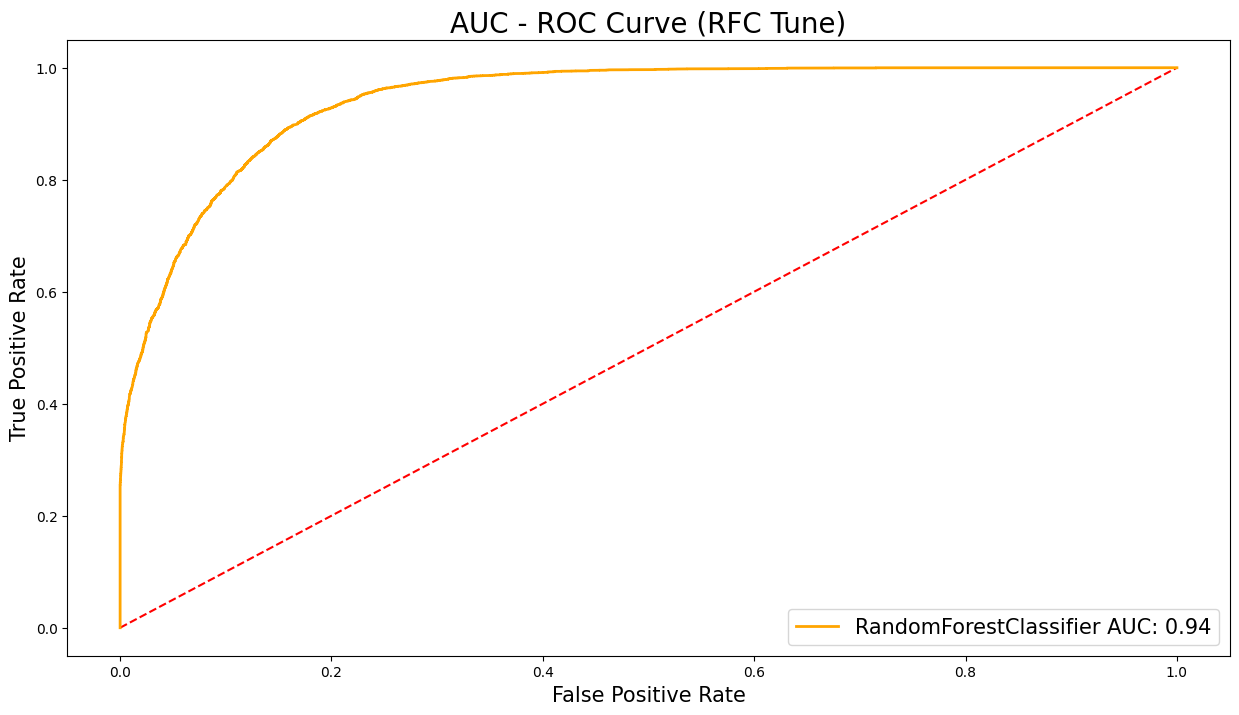

In [98]:
# Plot Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)

# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'RandomForestClassifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('AUC - ROC Curve (RFC Tune)', fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)
plt.show()

### Final Strategy Objective
* Untuk memilih dan menyimpan model dan parameter terbaik sebelum proses penerapan ke Streamlit.

XGBoost Classifier (xgb_tune)
--
* Accuracy: 0.87
* F1-score: 0.87

Confusion Matrix:
* True Negative (TN): 6159 (Correctly predicted <=50K)
* False Positive (FP): 1306 (Incorrectly predicted >50K when it was <=50K)
* False Negative (FN): 675 (Incorrectly predicted <=50K when it was >50K)
* True Positive (TP): 6722 (Correctly predicted >50K)

---

Random Forest Classifier (rfc_tune)
--
* Accuracy: 0.88
* F1-score: 0.89

Confusion Matrix:
* True Negative (TN): 6208 (Correctly predicted <=50K)
* False Positive (FP): 1257 (Incorrectly predicted >50K when it was <=50K)
* False Negative (FN): 619 (Incorrectly predicted <=50K when it was >50K)
* True Positive (TP): 6778 (Correctly predicted >50K)

---

Comparison and Interpretation:
--
* Kedua model menunjukkan performa yang kuat, dengan akurasi dan skor F1 yang sangat mirip. **Namun, `rfc_tune` sedikit lebih unggul daripada xgb_tune dalam kedua metrik tersebut.**

Overall Performance:
--
* `rfc_tune` menunjukkan akurasi yang sedikit lebih tinggi (0,88 vs 0,87) dan skor F1 (0,89 vs 0,87),
* Menunjukkan bahwa ia sedikit lebih baik dalam menyeimbangkan presisi dan recall di kedua kelas.

Error Analysis (Confusion Matrix):
--
* `rfc_tune` memiliki sedikit lebih sedikit False Positives (1257 vs 1306) dan False Negatives (619 vs 675) dibandingkan dengan xgb_tune.
* Ini menunjukkan bahwa model `Random Forest` membuat sedikit lebih sedikit kesalahan dalam memprediksi pendapatan tinggi ketika sebenarnya rendah, dan memprediksi pendapatan rendah ketika sebenarnya tinggi.
* Secara khusus, `rfc_tune` sedikit lebih baik dalam mengidentifikasi kedua kelompok pendapatan dengan benar (jumlah TN dan TP yang lebih tinggi) dan membuat lebih sedikit klasifikasi yang salah (jumlah FP dan FN yang lebih rendah).

---

Conculsion
--
* Kesimpulannya, meskipun kedua model berkinerja sangat baik, Random Forest Classifier setelah disetel `(rfc_tune)` menunjukkan peningkatan kecil namun konsisten dalam metrik kinerja dan keseimbangan yang sedikit lebih baik dalam matriks kebingungannya untuk dataset khusus ini.

### RFC Tune: Load Model and Data Scaler to reuse it again

In [99]:
import joblib

# Save the rfc_tune model with compression
# A compression level of 3 is a good balance between size and speed.
joblib.dump(rfc_tune, 'rfc_tune_model.joblib', compress=3)

# Save the scaler (if not already saved or if updated)
# Scalers can also benefit from joblib serialization
joblib.dump(scaler, 'scaler.joblib', compress=3)

print("Model 'rfc_tune_model.joblib' and 'scaler.joblib' saved successfully with compression.")

Model 'rfc_tune_model.joblib' and 'scaler.joblib' saved successfully with compression.


In [100]:
!pip install streamlit

In [101]:
%%writefile app.py

# This cell writes the Streamlit app code into a file named 'app.py'

import streamlit as st
import joblib # Changed from pickle to joblib for compressed model loading
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px # Added for Plotly charts

# Load the trained model and scaler
try:
    # Assuming rfc_tune_model.joblib is the final chosen model
    model = joblib.load('rfc_tune_model.joblib') # Load model using joblib
    scaler = joblib.load('scaler.joblib') # Load scaler using joblib
except FileNotFoundError:
    st.error("Model or scaler file not found. Please ensure 'rfc_tune_model.joblib' and 'scaler.joblib' are in the same directory.")
    st.stop()

# Define the expected columns for the model input (X) in the exact order
model_columns = [
    'age', 'capital_gain', 'capital_loss', 'hours_per_week',
    'workclass_Unknown', 'education_11th', 'education_12th', 'education_1st-4th',
    'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
    'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
    'education_HS-grad', 'education_Masters', 'education_Preschool',
    'education_Prof-school', 'education_Some-college', 'marital_status_not married',
    'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial',
    'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
    'occupation_Machine-op-inspct', 'occupation_No-occupation', 'occupation_Other-service',
    'occupation_Priv-house-serv',
    'occupation_Prof-specialty',
    'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support',
    'occupation_Transport-moving', 'occupation_Unknown', 'relationship_Not-in-family',
    'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried',
    'relationship_Wife', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
    'race_White', 'sex_Male', 'native_country_United-States'
]

# Numerical columns that need scaling
numerical_cols = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']

# Categorical columns used for one-hot encoding (original column names)
categorical_cols = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country'
]

st.set_page_config(layout="wide") # Use wide layout for better space utilization

# --- Image placement ---
top_left_col, top_right_col = st.columns([4, 1])
with top_right_col:
    st.image('image1.png', width=400) # Adjust width as needed

st.title("📈 Income Prediction Dashboard")
st.markdown("""
Welcome to the Income Prediction Dashboard! Provide an individual's characteristics below,
and this application will predict whether their annual income is **>50K** or **<=50K**.
""")
st.markdown('---')

st.header("👤 Individual Characteristics")
st.markdown("Adjust the values and select the options below to describe the individual:")

# --- Logic to sort features by importance for UI display ---
# This block calculates the importance of original features and sorts them.
if model is not None:
    feature_importances = model.feature_importances_
    feature_importance_series = pd.Series(feature_importances, index=model_columns)

    original_feature_max_importance = {}
    all_original_features = categorical_cols + numerical_cols

    for original_col in all_original_features:
        max_imp = 0.0
        # Check if the original column name itself is present in the model_columns (e.g., numerical, or single-dummy for binary)
        if original_col in feature_importance_series.index:
            max_imp = max(max_imp, feature_importance_series[original_col])

        # Check for one-hot encoded columns that start with the original column name
        for encoded_col in model_columns:
            if encoded_col.startswith(f'{original_col}_'):
                max_imp = max(max_imp, feature_importance_series.get(encoded_col, 0.0))

        original_feature_max_importance[original_col] = max_imp

    # Ensure all original features are accounted for, even if they had zero importance or no direct encoded column with importance
    for of in all_original_features:
        if of not in original_feature_max_importance:
            original_feature_max_importance[of] = 0.0 # Assign 0 if no importance found

    sorted_original_features_with_importance = sorted(original_feature_max_importance.items(), key=lambda item: item[1], reverse=True)
    sorted_original_feature_names = [item[0] for item in sorted_original_features_with_importance]
else:
    # Fallback order if model is not loaded (should not happen normally)
    sorted_original_feature_names = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']

def user_input_features():
    user_inputs = {}

    # Dictionary of lambda functions to create each widget, mapping original feature name to its widget creator
    widget_definitions = {
        'age': lambda: st.slider('Age', 17, 90, 30),
        'workclass': lambda: st.selectbox('Workclass', ['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']),
        'education': lambda: st.selectbox('Education', ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', '9th', 'Prof-school', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool']),
        'marital_status': lambda: st.selectbox('Marital Status', ['not married', 'married']),
        'occupation': lambda: st.selectbox('Occupation', ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Unknown', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'No-occupation']),
        'relationship': lambda: st.selectbox('Relationship', ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative']),
        'race': lambda: st.selectbox('Race', ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']),
        'sex': lambda: st.selectbox('Sex', ['Male', 'Female']),
        'capital_gain': lambda: st.number_input('Capital Gain', 0, 99999, 0),
        'capital_loss': lambda: st.number_input('Capital Loss', 0, 4356, 0),
        'hours_per_week': lambda: st.slider('Hours per Week', 1, 99, 40),
        'native_country': lambda: st.selectbox('Native Country', ['United-States', 'Other'])
    }

    # Create widgets in the sorted order of importance, arranging them in columns
    num_cols_per_row = 2 # Number of input columns per row for better layout
    cols = st.columns(num_cols_per_row) # Create initial columns for the first row

    col_index = 0
    for feature_name in sorted_original_feature_names:
        if feature_name in widget_definitions: # Ensure the feature has a defined widget
            with cols[col_index]:
                user_inputs[feature_name] = widget_definitions[feature_name]()
            col_index = (col_index + 1) % num_cols_per_row
            if col_index == 0: # If the current row is full, create a new set of columns
                cols = st.columns(num_cols_per_row)

    features = pd.DataFrame(user_inputs, index=[0])
    return features

input_df_raw = user_input_features()

# Preprocessing user input to match model's training data
def preprocess_input_for_model(df_raw):
    # Create a DataFrame with all expected model columns, initialized to 0
    processed_input_df = pd.DataFrame(0, index=[0], columns=model_columns)

    # Populate numerical features from raw input
    for col in numerical_cols:
        if col in df_raw.columns:
            processed_input_df[col] = df_raw[col].iloc[0]

    # Process categorical features to generate dummy variables
    for cat_col in categorical_cols:
        if cat_col in df_raw.columns:
            value = df_raw[cat_col].iloc[0]

            # Specific handling for marital_status and native_country which were pre-transformed
            # and then implicitly one-hot encoded (with drop_first=True logic)
            if cat_col == 'marital_status':
                if value == 'not married' and 'marital_status_not married' in processed_input_df.columns:
                    processed_input_df['marital_status_not married'] = 1
            elif cat_col == 'native_country':
                if value == 'United-States' and 'native_country_United-States' in processed_input_df.columns:
                    processed_input_df['native_country_United-States'] = 1
            elif cat_col == 'sex': # Handle sex_Male specifically since it's a direct dummy if 'sex_Female' was dropped
                if value == 'Male' and 'sex_Male' in processed_input_df.columns:
                    processed_input_df['sex_Male'] = 1
            else:
                # For other categorical columns that were one-hot encoded with drop_first=True (or specific drops)
                # We construct the dummy column name and set to 1 if it exists in model_columns
                dummy_col_name = f"{cat_col}_{value}"
                if dummy_col_name in processed_input_df.columns:
                    processed_input_df[dummy_col_name] = 1

    # Apply scaling to numerical features
    processed_input_df[numerical_cols] = scaler.transform(processed_input_df[numerical_cols])

    return processed_input_df

# --- Custom CSS for button styling ---
st.markdown("""
<style>
div.stButton > button {
    background-color: #4CAF50; /* Green background */
    color: white;
    padding: 15px 30px; /* Bigger padding */
    font-size: 20px; /* Larger font size */
    font-weight: bold; /* Bolder text */
    border: none;
    border-radius: 8px;
    cursor: pointer;
    transition: background-color 0.3s ease;
}
div.stButton > button:hover {
    background-color: #45a049; /* Darker green on hover */
}
</style>
""", unsafe_allow_html=True)

# --- Centered 'Predict Income' button ---
col1_btn, col2_btn, col3_btn = st.columns([3, 2, 2]) # Adjust ratio for centering
with col2_btn:
    predict_clicked = st.button('Predict Income', type="primary", help="Click to get the income prediction based on the entered characteristics")

if predict_clicked:
    processed_input = preprocess_input_for_model(input_df_raw)
    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)

    st.subheader('🚀 Prediction Results')
    st.markdown('---')

    col1, col2 = st.columns(2)

    with col1:
        st.write("### Predicted Income Level:")
        if prediction[0] == 1:
            st.success("**Income >50K (High Income) 🎉**")
        else:
            st.info("**Income <=50K (Low Income) 📉**")

    with col2:
        st.write("### Prediction Confidence:")
        st.metric(label="Probability of <=50K", value=f"{prediction_proba[0][0]:.2%}")
        st.metric(label="Probability of >50K", value=f"{prediction_proba[0][1]:.2%}")

    st.markdown('---')
else:
    st.info(" Adjust the features above and click 'Predict Income' to see the results! 👆 ")



# --- Feature Importance Plot ---
st.subheader('📊 Feature Importance from Random Forest Classifier')
st.markdown("""
**Random Forest Classifier with Hyperparameter Tuning (Random Over Sampler & Randomized Search CV Method)**
""")
st.markdown("""
This interactive chart reveals which features had the most significant impact on the model's income predictions.
A higher 'Importance' score indicates a greater influence on the outcome.
""")

if model is not None:
    # Get feature importances from the loaded model
    feature_importances = model.feature_importances_

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': model_columns,
        'Importance': feature_importances
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Create interactive bar chart using Plotly Express
    fig = px.bar(importance_df.head(20), # Display top 20 features for clarity
                 x='Importance',
                 y='Feature',
                 orientation='h',
                 title='Top 20 Most Important Features',
                 labels={'Importance': 'Feature Importance Score', 'Feature': 'Feature Name'},
                 height=600,
                 color='Importance',
                 color_continuous_scale=px.colors.sequential.Viridis) # Use a nice color scale

    fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Order features from most to least important

    st.plotly_chart(fig, use_container_width=True)
else:
    st.warning("Model not loaded. Cannot display feature importance.")

st.markdown('---')
st.caption("Developed with Streamlit and Scikit-learn by Dataverse Team DS55. Data Source: https://www.kaggle.com/code/tawfikelmetwally/census-income-analysis-and-modeling/input") # Footer

Writing app.py
